# Import dependencies

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

In [112]:
tf.__version__

'2.0.0'

# Dataset preprocessing

In [113]:
fashion=keras.datasets.fashion_mnist

In [114]:
type(fashion)

module

In [115]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("X training samples", X_train.shape)
print("y training samples", y_train.shape)
print("X testing samples", X_test.shape)
print("y testing samples", y_test.shape)

X training samples (60000, 28, 28)
y training samples (60000,)
X testing samples (10000, 28, 28)
y testing samples (10000,)


In [116]:
np.max(X_train)

255

In [117]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

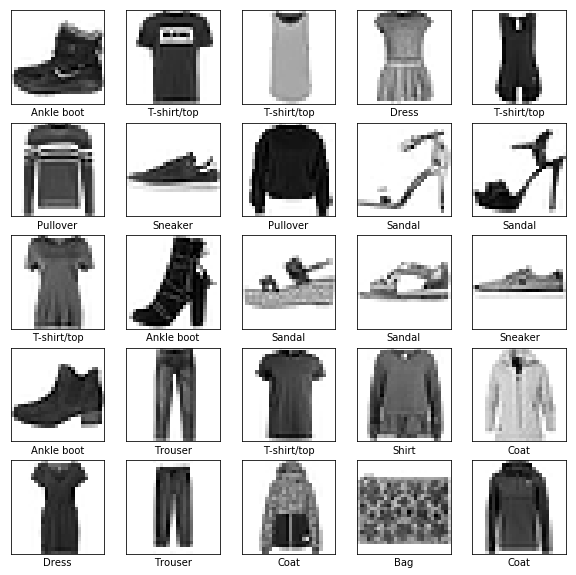

In [118]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [119]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Image (#150): Which is digit '9'


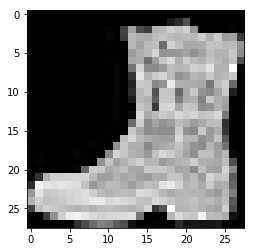

In [120]:
# Display as image
%matplotlib inline
digit = 150 # Change to choose new digit
a = X_train[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is digit '{}'".format(digit,y_train[digit]))

# Image normalization
Pixel will be in the rainge [0, 1]. By normalizing images we are making sure that our model (ANN) trains faster.

In [121]:
X_train = X_train / 255.0
X_test = X_test / 255.0

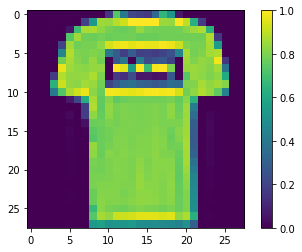

In [122]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

# Reshaping of the dataset
Since we are using fully connected network, we reshape the training and testing subsets to be in the vector format.

In [123]:
X_train.shape

(60000, 28, 28)

In [124]:
X_train = X_train.reshape(-1, 28*28)
print("reshaped X_train: " , X_train.shape)

reshaped X_train:  (60000, 784)


In [125]:
X_test = X_test.reshape(-1, 28*28)
print("reshaped X_test: " , X_test.shape)

reshaped X_test:  (10000, 784)


# Building an Artificial Neural network

# Defining the model
Simply define an object of the Sequential model.

In [126]:
model = tf.keras.models.Sequential()

# Adding the first layer (Dense layer)
Layer hyper-parameters:

number of units/neurons: 128
activation function: ReLU
input_shape: (784, )

In [127]:
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))

# Adding a Dropout layer
Dropout is a Regularization technique where we randomly set neurons in a layer to zero. In this way, while training those neurons won't be updated. Because some percentage of neurons won't be updated the whole training process is long and we have less chance for overfitting.

In [128]:
model.add(tf.keras.layers.Dropout(0.1))

In [129]:
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))

# Adding the second layer (output layer)
units == number of classes (10 in the case of Fashion MNIST)
activation = 'softmax'

In [130]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Compiling the model
Optimizer: Adam
Loss: Sparse softmax (categorical) crossentropy

In [131]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])


In [132]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


# Training the model

In [133]:
model.fit(X_train, y_train, epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 11s 180us/sample - loss: 0.5419 - sparse_categorical_accuracy: 0.8070
Epoch 2/15
60000/60000 [==============================] - 9s 154us/sample - loss: 0.3984 - sparse_categorical_accuracy: 0.8545
Epoch 3/15
60000/60000 [==============================] - 9s 151us/sample - loss: 0.3619 - sparse_categorical_accuracy: 0.8676
Epoch 4/15
60000/60000 [==============================] - 10s 162us/sample - loss: 0.3415 - sparse_categorical_accuracy: 0.8759
Epoch 5/15
60000/60000 [==============================] - 10s 159us/sample - loss: 0.3231 - sparse_categorical_accuracy: 0.8801
Epoch 6/15
60000/60000 [==============================] - 10s 161us/sample - loss: 0.3119 - sparse_categorical_accuracy: 0.8850
Epoch 7/15
60000/60000 [==============================] - 10s 168us/sample - loss: 0.3018 - sparse_categorical_accuracy: 0.8869
Epoch 8/15
60000/60000 [==============================] - 9s 151us/sample - loss: 0

# Model evaluation and prediction

In [134]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [135]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8810999989509583
